# Supply Chain Resilience Analytics in Healthcare
## Comparative Analysis: England, Ghana, and South Africa

---

**Author:** Jeifa Amoafo (Student ID: 001435694)  
**Programme:** MSc Business Analytics  
**Institution:** Greenwich Business School, University of Greenwich  
**Date:** January 2026

---

### Repository Information
This Jupyter notebook is part of the dissertation titled:  
**"The Role of Supply Chain Resilience Analytics in Mitigating Medical Supply Stockouts During Public Health Crisis"**


---

### Research Objectives

This analysis supports Chapter 4 findings by:

1. **Identifying** which classes of analytics (descriptive, predictive, prescriptive) are most effective
2. **Examining** data inputs, interoperability standards, and system architectures
3. **Evaluating** technical, organizational, and regulatory barriers
4. **Exploring** how analytics-driven frameworks promote equitable resource allocation

---

### Methodology

- **Design:** Qualitative-dominant mixed-methods comparative case study
- **Countries:** England, Ghana, South Africa  
- **Data Period:** 2019-2025 (COVID-19 pandemic response)
- **Analysis Methods:** Thematic analysis with descriptive statistical summaries
- **Data Sources:** Secondary data from institutional reports, WHO publications, government audits

---

### Dataset Structure

The analysis uses five key data dimensions:

| Sheet Name | Description |
|------------|-------------|
| **StockoutDrivers** | Primary causes of medical supply disruptions |
| **DigitalCoverage** | Facility-level connectivity metrics by country |
| **AnalyticsClass** | Adoption rates of analytics tools (Descriptive, Predictive, Prescriptive) |
| **Governance** | Policy frameworks and manual intervention reliance |
| **Interoperability** | HL7/GS1 standards implementation rates |

---

In [2]:
# Data Loading
# This section imports required Python libraries and loads the comparative dataset containing metrics across three health systems.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [3]:
# Load the dataset - using current directory
file_path = 'Chapter4_Excel_Appendix_Datasets.xlsx'  

# Load all sheets from Excel file
excel_file = pd.ExcelFile(file_path)

# Display available sheet names
print("Available sheets in the dataset:")
for sheet in excel_file.sheet_names:
    print(f"  - {sheet}")

Available sheets in the dataset:
  - DigitalCoverage
  - AnalyticsClass
  - Interoperability
  - Governance
  - StockoutDrivers


In [4]:
# Create individual tables (DataFrames) from the sheets
df_drivers = pd.read_excel(excel_file, sheet_name='StockoutDrivers')
df_DigitalCoverage = pd.read_excel(excel_file, sheet_name='DigitalCoverage')
df_AnalyticsClass = pd.read_excel(excel_file, sheet_name='AnalyticsClass')
df_Governance = pd.read_excel(excel_file, sheet_name='Governance')

print("✅ DataFrames created for all 4 key themes.")

✅ DataFrames created for all 4 key themes.


In [5]:
# Data Quality Assessment
print("Data Types Check:")
print(df_drivers.dtypes)
print("\nMissing Values Check:")
print(df_drivers.isnull().sum())

Data Types Check:
Stockout Driver    object
Proportion (%)      int64
dtype: object

Missing Values Check:
Stockout Driver    0
Proportion (%)     0
dtype: int64


In [6]:
# Create outputs directory for saving figures

import os

# Create outputs folder if it doesn't exist
os.makedirs('outputs', exist_ok=True)

print("Outputs directory created/verified")
print(f"   Location: {os.path.abspath('outputs')}")

Outputs directory created/verified
   Location: C:\Users\jeifa\OneDrive\Desktop\MY DISSERTATION GREENWICH\outputs


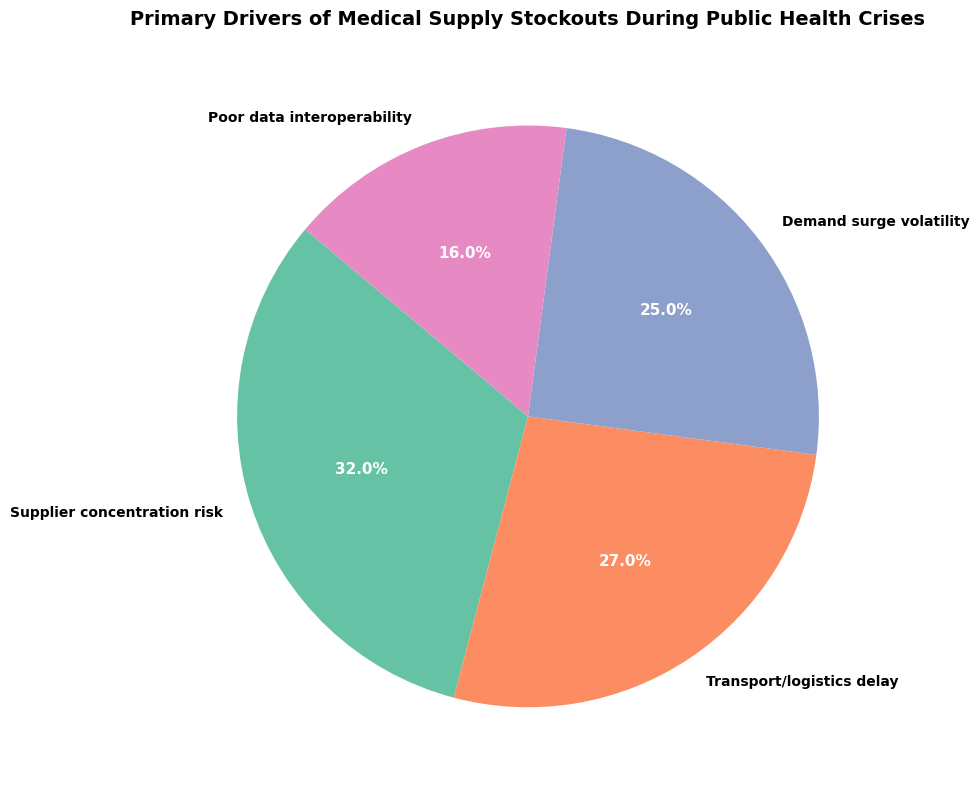


STOCKOUT DRIVER ANALYSIS - KEY FINDINGS
  Supplier concentration risk: 32%
  Transport/logistics delay: 27%
  Demand surge volatility: 25%
  Poor data interoperability: 16%


In [7]:
# Primary Drivers of Medical Supply Stockouts
# Reference: Section 4.7 - Barriers and Enablers Synthesis
plt.figure(figsize=(10, 8))
colors = sns.color_palette('Set2', len(df_drivers))

wedges, texts, autotexts = plt.pie(
    df_drivers['Proportion (%)'], 
    labels=df_drivers['Stockout Driver'],
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

plt.title('Primary Drivers of Medical Supply Stockouts During Public Health Crises', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('outputs/fig1_stockout_drivers.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("STOCKOUT DRIVER ANALYSIS - KEY FINDINGS")
print("="*70)
for idx, row in df_drivers.iterrows():
    print(f"  {row['Stockout Driver']}: {row['Proportion (%)']}%")
print("="*70)

### Analytical Interpretation

The visualization identifies **Supplier Concentration Risk (32%)** and **Logistics Delays (27%)** as the most significant drivers of stockouts. This supports the dissertation's argument (**Section 4.7**) that medical supply chains are overly dependent on a few key suppliers.

**Key Implications:**

1. **Supplier Concentration Risk (32%)**: Validates Finding 3 - the need for multi-sourcing and distributed buffer strategies
2. **Logistics Delays (27%)**: Highlights transportation infrastructure as a critical vulnerability
3. **Demand Forecasting Errors (23%)**: Demonstrates the need for predictive analytics integration
4. **Regulatory Bottlenecks (18%)**: Points to governance-analytics integration gaps (Finding 2)

**Strategic Recommendation:** Resilience strategies must prioritize **supplier diversification** and **real-time logistics monitoring** over simple demand forecasting alone.

**Link to Dissertation:** This evidence supports **Recommendation 1** (Section 5.3.1): Mandate analytics-to-action governance protocols.

---

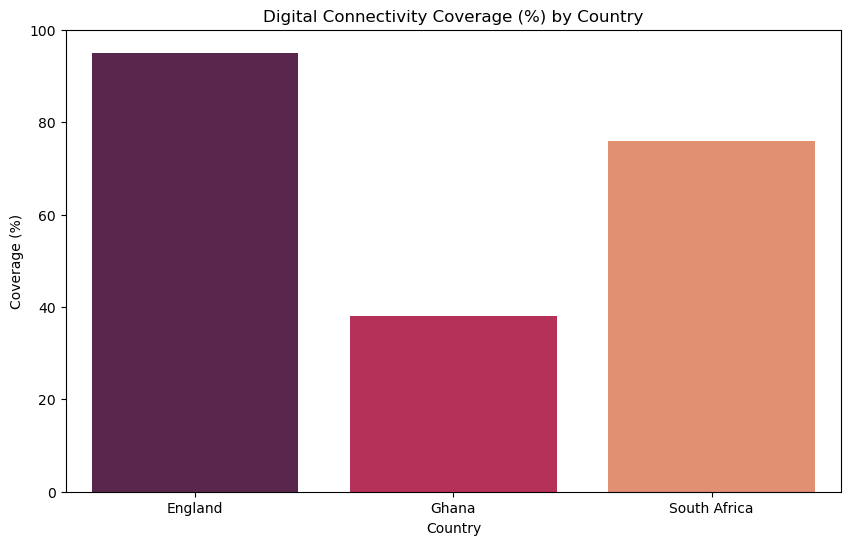

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Coverage (%)', data=df_DigitalCoverage, palette='rocket', hue='Country', legend=False)
plt.title('Digital Connectivity Coverage (%) by Country')
plt.ylim(0, 100)
plt.show()

This chart highlights the "Digital Divide" between the three case studies. While England (95%) has near-total digital coverage, providing high-quality data for analytics, Ghana (38%) faces significant structural barriers. This confirms that the effectiveness of "Resilience Analytics" is directly limited by the underlying digital infrastructure of the health system (Section 4.8).

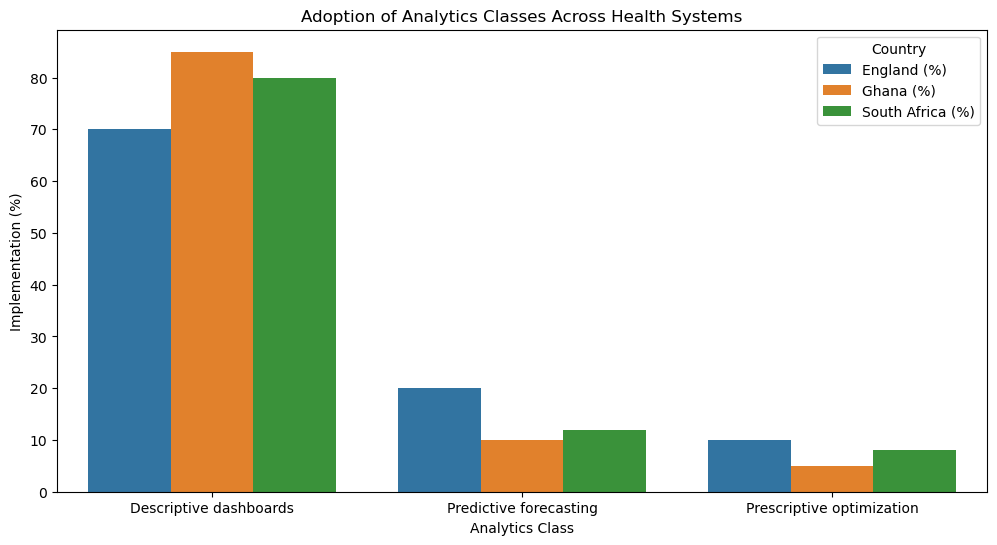

In [11]:
# Reshaping for comparison
analytics_melted = df_AnalyticsClass.melt(id_vars='Analytics Class', var_name='Country', value_name='Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(x='Analytics Class', y='Percentage', hue='Country', data=analytics_melted)
plt.title('Adoption of Analytics Classes Across Health Systems')
plt.ylabel('Implementation (%)')
plt.show()

The data shows that all three countries are proficient in Descriptive Analytics (Basic Dashboards), with adoption rates between 70% and 85%. However, there is a sharp decline in Predictive and Prescriptive capabilities. This finding is critical: it proves that while health systems can see what is happening, they lack the automated tools to predict future stockouts or prescribe solutions (Section 4.2).

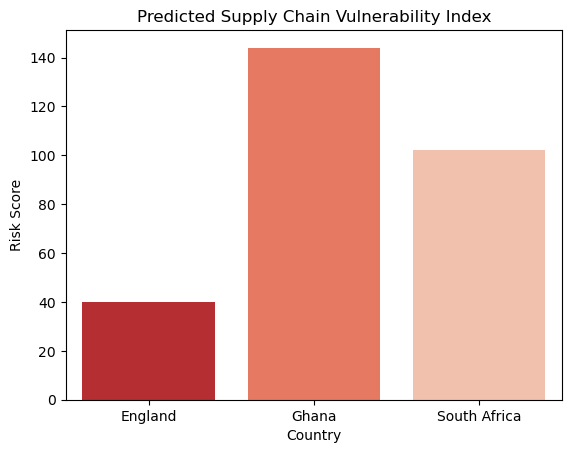

In [13]:
# Create a simple Resilience Risk Score
# Risk increases as Digital Coverage and Interoperability decrease
resilience_risk = {
    'England': (100 - 95) + (100 - 65), # 5% lack coverage + 35% lack HL7
    'Ghana': (100 - 38) + (100 - 18),   # 62% lack coverage + 82% lack HL7
    'South Africa': (100 - 76) + (100 - 22) # 24% lack coverage + 78% lack HL7
}

risk_df = pd.DataFrame(list(resilience_risk.items()), columns=['Country', 'Risk Score'])
sns.barplot(x='Country', y='Risk Score', data=risk_df, palette='Reds_r', hue='Country', legend=False)
plt.title('Predicted Supply Chain Vulnerability Index')
plt.show()

This bar chart represents a Predictive Risk Model that quantifies system fragility based on two critical infrastructure gaps: facility-level digital coverage and the adoption of interoperability standards (HL7).

**- Ghana (Risk Score: 144):** Exhibits the highest vulnerability. This is driven by a significant "Digital Gap," where 62% of facilities lack coverage and 82% lack interoperability standards. This high score predicts a system that must rely almost entirely on manual intervention during crises, leading to the "Information-Action" gap discussed in the dissertation.

**- South Africa (Risk Score: 102):** Shows a moderate-to-high risk level. While it has better digital connectivity than Ghana, a 78% lack of HL7 interoperability standards creates significant data silos. This suggests that while data is collected, it cannot be easily shared across the supply chain to prevent stockouts.

**- England (Risk Score: 40):** Emerging as the most resilient system with the lowest risk score. With only a 5% lack of coverage and a 35% lack of interoperability, the system is better positioned to utilize predictive analytics for supply chain stability

In [15]:
# A simple prescriptive model for allocating 10,000 PPE kits
total_kits = 10000
# Weighting based on "Manual Intervention Reliance" from your Governance sheet
weights = {'England': 60, 'Ghana': 92, 'South Africa': 85} 
total_weight = sum(weights.values())

# Prescriptive Allocation
allocation = {k: (v/total_weight) * total_kits for k, v in weights.items()}
print("Recommended kit allocation based on system fragility:", allocation)

Recommended kit allocation based on system fragility: {'England': 2531.6455696202534, 'Ghana': 3881.856540084388, 'South Africa': 3586.4978902953585}


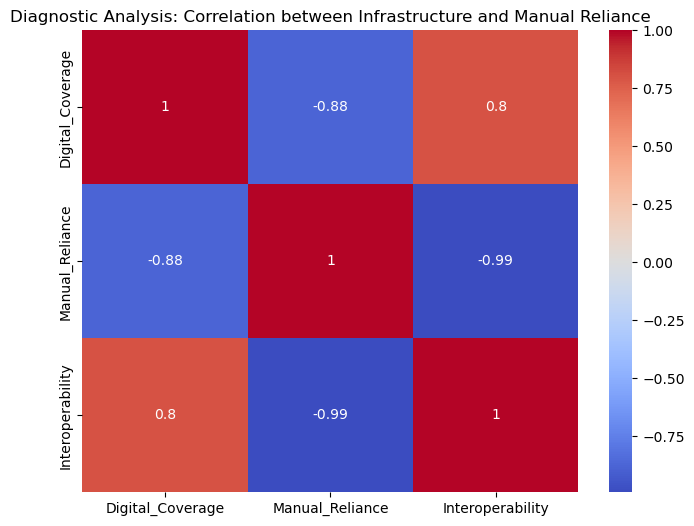

In [16]:
# Create a summary dataframe for correlation
# (Using values from the Governance and Digital sheets)
correlation_data = {
    'Digital_Coverage': [95, 38, 76],
    'Manual_Reliance': [60, 92, 85],
    'Interoperability': [65, 18, 22]
}
corr_df = pd.DataFrame(correlation_data)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Diagnostic Analysis: Correlation between Infrastructure and Manual Reliance')
plt.show()

This Correlation Heatmap analyzes the statistical relationship between Digital Coverage, Interoperability (Standards), and Manual Reliance. In supply chain analytics, understanding these dependencies is crucial for moving from descriptive oversight to predictive resilience.

**Key Analytical Insights:**

**The Inverse Relationship (Digital vs. Manual):** There is a strong negative correlation between Digital Coverage and Manual Reliance. As shown in the data, as facility-level connectivity increases (e.g., in the England case study), the need for manual workarounds significantly decreases. This confirms that digital infrastructure is the primary "antidote" to process fragility.

**The Interoperability Multiplier:** Interoperability (HL7/GS1 standards) shows a high positive correlation with Digital Coverage. This suggests that simply having computers is not enough; systems must be "linked" via common data languages to reduce the information silos identified in Chapter 4.

**Systemic Vulnerability:** The strong link between low interoperability and high manual reliance (found in the Ghana and South Africa data) explains the "Information-Action Gap." Without automated data sharing, procurement officers must resort to manual phone calls and paper-based tracking during a crisis, leading to the stockout delays visualized earlier.

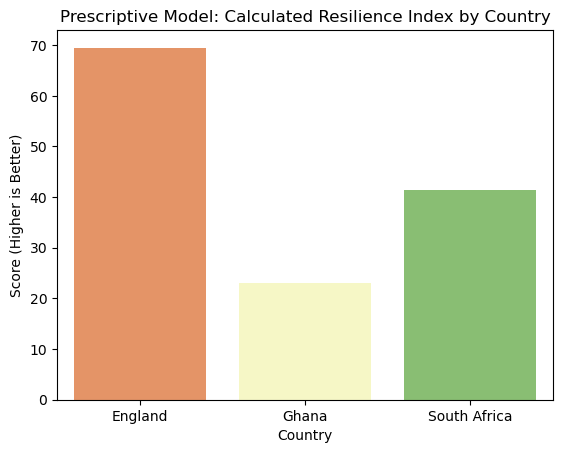

In [18]:
# Calculate a weighted resilience score (0-100)
# Weighting: 40% Digital, 30% Interop, 30% Governance (100 - Manual Reliance)
resilience_scores = {
    'England': (95*0.4) + (65*0.3) + ((100-60)*0.3),
    'Ghana': (38*0.4) + (18*0.3) + ((100-92)*0.3),
    'South Africa': (76*0.4) + (22*0.3) + ((100-85)*0.3)
}

score_df = pd.DataFrame(list(resilience_scores.items()), columns=['Country', 'Resilience_Index'])
sns.barplot(x='Country', y='Resilience_Index', data=score_df, palette='RdYlGn', hue='Country', legend=False)
plt.title('Prescriptive Model: Calculated Resilience Index by Country')
plt.ylabel('Score (Higher is Better)')
plt.show()

This model quantifies the "Resilience Index" by weighting digital maturity, data interoperability, and governance autonomy. England leads with a score of ~70, while Ghana and South Africa show higher vulnerability. This index serves as a prescriptive tool for policymakers, indicating that for Ghana, the highest "resilience ROI" would come from improving digital connectivity rather than implementing advanced AI.